In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
from librosa.core import audio
import librosa.display
import IPython.display as  ipd
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
data_path = "/Volumes/GoogleDrive/My Drive/Projects/music_classification/Data"
print(list(os.listdir(f'{data_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'reggae', 'pop', 'rock', '.DS_Store']


Load in one reggae genre song and have an intial look at its shape and length of the song

In [6]:
y, sr = librosa.load(f'{data_path}/genres_original/reggae/reggae.00036.wav')
print('y: ',y,'\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (kHz):', sr, '\n')

#Verify the length of the audio
print('Check Len of Audio:', str(round(len(y)/sr)))

y:  [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (kHz): 22050 

Check Len of Audio: 30


Librosa load the song in as an 1D array with the length of 661794. The song is 30 seconds long with the total of 22050 kHz.

Removing any silence before and after the actual audio to ensure that we are only working with the music.

In [7]:
#Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

#The result is an numpy ndaaray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


The audio shape remains after trimming, so there is no silence before and after audio

Let take a look at the sound waves for the song.

Text(0.5, 1.0, 'Sound Waves in Reggae 36')

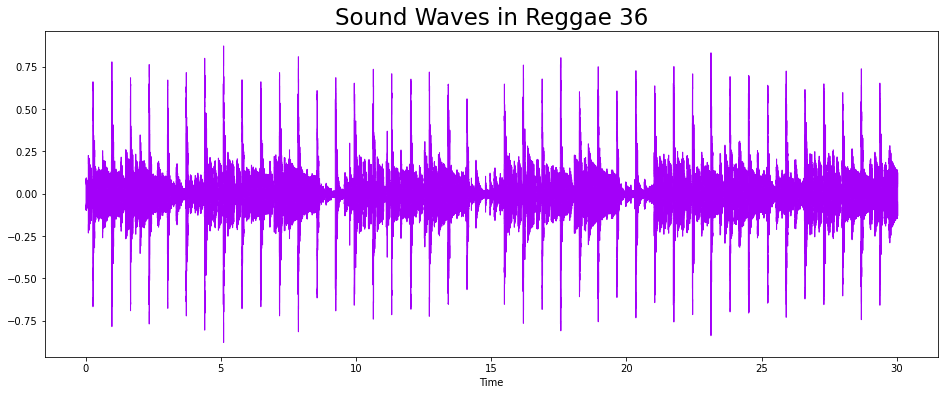

In [11]:
plt.figure(figsize = (16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize = 23)

## Spectrogram

One of the way to visualize audio data is to use spectrogram, or sometimes called sonographs, voiceprints, or voicegram. A spectrogram is a visual way of representing the signal strength, or "loudness", of a signal over time at various frequencies present in a particular waveform.

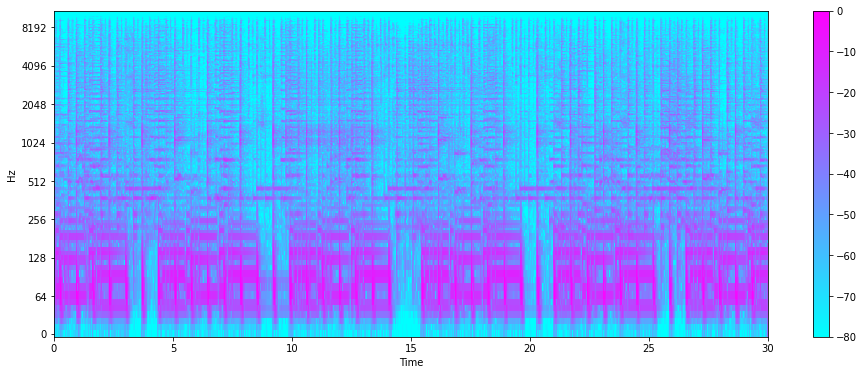

In [12]:
#Default FFT window size
n_fft = 2048 #FFT window size
hop_length = 512 #number audio of frames between STFT columns (looks like a good default)

#Short-time Fourier Tranform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

#Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

#Creating the spectrogram
plt.figure(figsize = (16,6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar();

Generally, spectrogram have two-dimensions. Time runs from oldest to youngest along the horizontal axis. The vertical axis represents frequency, or can be thought as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top. The third dimension is the amplitude (energy, or "loudness") of a particular frequency at a particular time is represented by color, with dark blues corresponding to low amplitudes and brighter colors corresponding to progressively stronger (or louder) amplitudes.